In [134]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, uniform
import pandas as pd
from scipy.integrate import quad
from library import *

n_samples = 1000
n_runs = 100
a, b = 0, 1
N_VARIANCES = 500

In [135]:
functions = [
    {
        "name": "Parabola",
        "function": lambda x: x**2,
        "integral": quad(lambda x: x**2, a, b)[0]
    },
    {
        "name": "Gaussian",
        "function": lambda x: np.exp(-x**2),
        "integral": quad(lambda x: np.exp(-x**2), a, b)[0]
    },
    {
        "name": "Sine",
        "function": np.sin,
        "integral": quad(np.sin, a, b)[0]
    },
    {
        "name": "Polynomial",
        "function": lambda x : x**3 - 2*x**2 + x,
        "integral": quad(lambda x : x**3 - 2*x**2 + x, a, b)[0]
    },
    {
        "name": "Exponential",
        "function": np.exp,
        "integral": quad(np.exp, a, b)[0]
    }
]

In [136]:
methods = [
    {
        "name" : "Direct Sampling",
        "function": direct_sampling,
    },
    {
        "name" : "Control Variates",
        "function": control_variates,
    },
    {
        "name" : "Importance Sampling",
        "function": importance_sampling,
    },
    {
        "name" : "Stratified Sampling",
        "function": stratified_sampling,
    },
    {
        "name" : "Antithetic Sampling",
        "function": antithetic_sampling,
    }
]

In [137]:
# Calculate errors
results = []
for method in methods:
    method_result = {"name": method["name"], "function_errors": []}
    for function in functions:
        result = method["function"](function["function"], a, b, n_samples)
        error = np.abs(function["integral"] - result)
        method_result["function_errors"].append({"name": function["name"], "error": error})
        print(f"{method['name']} - {function['name']}: {error} - {result} - {function['integral']}")
    results.append(method_result)

Direct Sampling - Parabola: 0.0006500497806066208 - 0.3326832835527267 - 0.3333333333333333
Direct Sampling - Gaussian: 0.007084199269290048 - 0.7539083320817171 - 0.7468241328124271
Direct Sampling - Sine: 0.008611688597495337 - 0.46830938272935557 - 0.45969769413186023
Direct Sampling - Polynomial: 0.0014364979721281784 - 0.08476983130546148 - 0.0833333333333333
Direct Sampling - Exponential: 0.004666036224385106 - 1.7136157922346602 - 1.7182818284590453
Control Variates - Parabola: 0.0009227611325481333 - 0.3324105722007852 - 0.3333333333333333
Control Variates - Gaussian: 0.0006015949784192731 - 0.7474257277908464 - 0.7468241328124271
Control Variates - Sine: 0.0007667293709067713 - 0.460464423502767 - 0.45969769413186023
Control Variates - Polynomial: 0.0005270306424680071 - 0.08386036397580131 - 0.0833333333333333
Control Variates - Exponential: 0.0002770969663394851 - 1.7185589254253848 - 1.7182818284590453
Importance Sampling - Parabola: 0.03791164531289781 - 0.3712449786462311

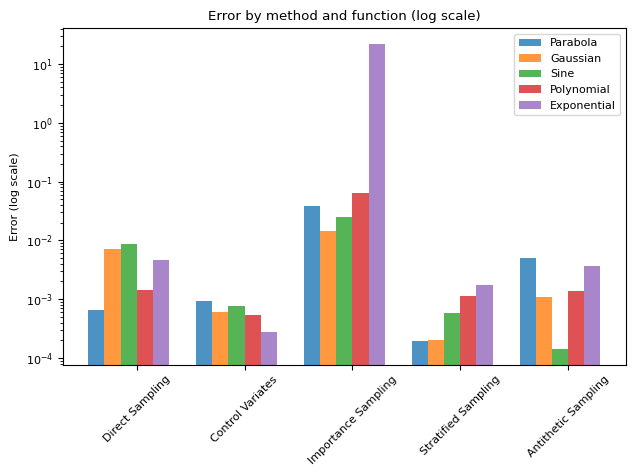

In [138]:
# Plotting
fig, ax = plt.subplots() 
n_methods = len(methods)
n_functions = len(functions)
bar_width = 0.15
opacity = 0.8

for i, function in enumerate(functions):
    errors = [method["function_errors"][i]["error"] for method in results]
    ax.bar(np.arange(n_methods) + i * bar_width, errors, bar_width, alpha=opacity, label=function["name"])

ax.set_ylabel('Error (log scale)')
ax.set_title('Error by method and function (log scale)')
ax.set_xticks(np.arange(n_methods) + bar_width * n_functions / 2)
ax.set_xticklabels([method["name"] for method in methods], rotation=45)  # Rotate labels for better readability
ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.legend()

plt.tight_layout()  # Adjust layout
plt.show()